In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = iris['target']
X = df.iloc[:, :-1]
y = df['target'] 
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
scale = preprocessing.StandardScaler()
scale.fit(X)
X_scalesArray = scale.transform(X)
XScaled = pd.DataFrame(X_scalesArray, columns = X.columns)

Text(0.5, 1.0, 'GMM')

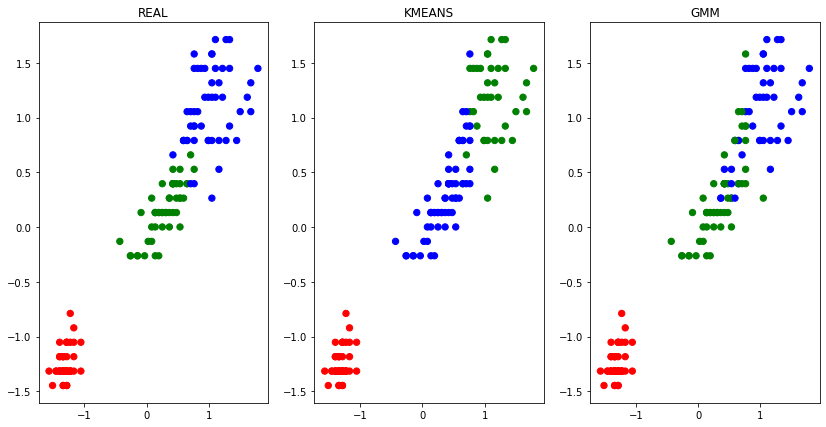

In [23]:
plt.figure(figsize = (14,7))
colormap = np.array(['red','green', 'blue'])


# real
plt.subplot(1,3,1)
plt.scatter(XScaled['petal length (cm)'], XScaled['petal width (cm)'], c = colormap[y], s =40)
plt.title("REAL")


# KMEANS
plt.subplot(1,3,2)
model = KMeans(n_clusters = 3, random_state = 0)
y_pred = model.fit_predict(X)
y_pred = np.choose(y_pred, [1,0,2]).astype(np.int64)
plt.scatter(XScaled['petal length (cm)'], XScaled['petal width (cm)'], c = colormap[y_pred], s =40)
plt.title("KMEANS")

# KMEAGMMNS
plt.subplot(1,3,3)
gmm = GaussianMixture(n_components = 3, max_iter = 200)
y_pred_gmm = model.fit_predict(XScaled)
y_pred_gmm = np.choose(y_pred_gmm, [2,0,1]).astype(np.int64)
plt.scatter(XScaled['petal length (cm)'], XScaled['petal width (cm)'], c = colormap[y_pred_gmm], s =40)
plt.title("GMM")